# Project: TMDb (The Movie Database) Analysis
The primary objective of this project is to explore the'TMDb Dataset' ([https://www.kaggle.com/tmdb/tmdb-movie-metadata]) by conducting suitable data-analysis using various tools and libraries like Jupyter Notebooks, IPython, Numpy, Pandas and Matplotlib. In order to make the findings more interpretable, project is further divided into the following four sections: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#question1">Question 1: What are the highest grossing films of all time?</a></li>
    <li><a href="#question2">Question 2: Which day of week has most number of releases?</a></li>
    <li><a href="#question3">Question 3: How does popularity influence revenue of a film?</a></li>
    <li><a href="#question4">Question 4: What is the average voting of films among viewers?</a></li>        
    </ul>
    <li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#limitations">Limitations</a></li>
    <li><a href="#references">References</a></li>
</ul>

## Introduction

TMDd-Movie Dataset was genrated by 'The Movie Database API' [(https://www.kaggle.com/tmdb/themoviedb.org)] which contains metadata on ~5000 movies including cast, crew, budget and revenue of each film. Using this data, we can start digging in to questions like:

- What are the highest grossing films of all time?
- Which day of week has most number of releases?
- How does popularity influence revenue of films?


In [102]:
# Importing required libraries like Numpy, Pandas and Matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Wrangling and munging data from its raw format into a suitable form appropriate for analysis.

In [103]:
# Loading the data into the DataFrame using pd.read_csv() function
# There are 21 Columns and 10,866 entries in this dataset
df = pd.read_csv('tmdb-movies.csv', header=0, parse_dates=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [104]:
# Checking the data-types of various columns using df.dtypes function
# Few datatypes are inconsistent like release_date and release_year
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [105]:
# Checking the shape of the dataset using the df.shape function
# Some columns are unnecessary for our analysis, should be excluded 
df.shape

(10866, 21)

In [106]:
# Printing summary of entire dataset using df.info() function
# There are missing values in few columns, must be repaired
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [107]:
# Generating descriptive statistics using df.describe() function
# Summarizes shape, central tendency and dispersion
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [108]:
# Checking for unique values using df.nunique() function
# There are multiple unique values in columns like Cast, Genre 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


## Data Cleaning 

### Detecting and cleaning data by getting rid of various inconsistencies or errors before reporting.

In [109]:
# Dropping unecessary columns using df.drop() function
df = df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1)

In [110]:
# Dropping duplicate entries using drop_duplicates() function
df.duplicated().sum()
df.drop_duplicates()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [111]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [112]:
# Checking missing values across columns using df.isnull() function
df.isnull().sum()
# Filling missing values for budget/revenue with with df.fillna() function 
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['revenue'].fillna(df['revenue'].mean(), inplace=True)
# Dropping null/NaN values in rows using df.dropna() function
df.dropna(axis=0, inplace=True)

In [113]:
# Converting datatypes of non-date columns using pd.to_datetime()
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = pd.DatetimeIndex(df['release_year']).year
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1970
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,1970
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,1970
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,1970


<a id='eda'></a>
## Exploratory Data Analysis

> Analyzing the dataset by summarising its main characteristics. Including, choice of various of graphical techniques that will aid in bird's eye view of the data to make some sense of it. Answering critical research questions along the way to supplement our findings.

<a id='question1'></a>
### Question 1: What are the highest grossing films of all time?
<p> Avatar(2.78B) was highest grossing film of all time, followed by Star Wars(2.06B) and Titanic(1.84B). </p>  

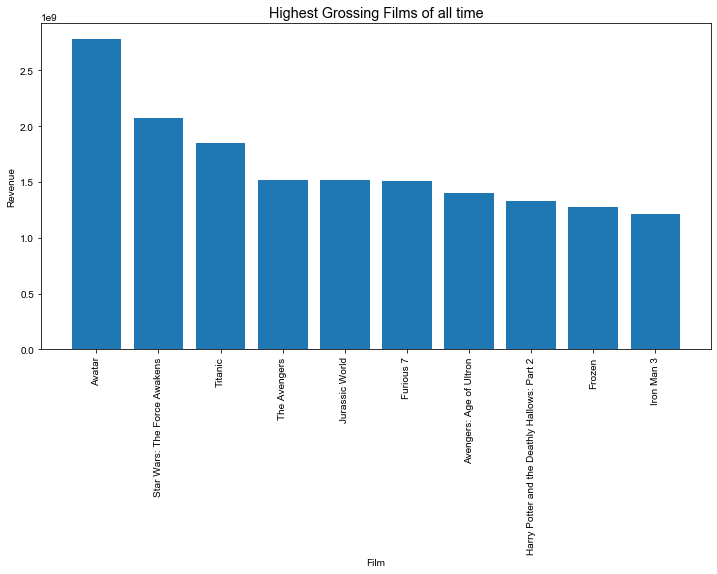

In [114]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
high_gross = df.sort_values(by='revenue', ascending=False)[:10]
plt.bar(high_gross['original_title'], high_gross['revenue'])
plt.xlabel('Film')
plt.ylabel('Revenue')
plt.title('Highest Grossing Films of all time')
plt.xticks(rotation=90)
plt.show()

<a id='question2'></a>
### Question 2: Which day of the week has most number of releases?
<p> Friday seems to have the most number of releases, followed by Thursday and Wednesday.

Text(0.5, 1.0, 'Most Films by Day of Week')

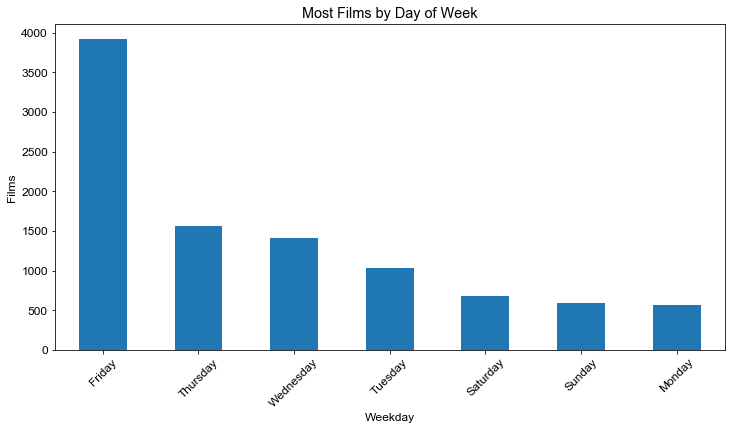

In [115]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
day_week = df['release_date'].dt.day_name()
day_week.value_counts().plot.bar()
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Films')
plt.title('Most Films by Day of Week')

<a id='question3'></a>
### Question 3: How does popularity influence revenue of a film?
<p> General positive correlation among popularity and revenue with few outliers. </p>

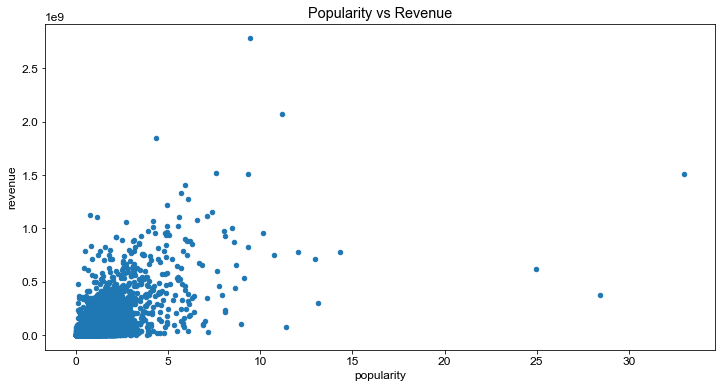

In [116]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
df.plot(x='popularity', y='revenue', kind='scatter', figsize=(12,6))
plt.title('Popularity vs Revenue')
plt.show()

<a id='question4'></a>
### Question 4: What does average voting among films look like?
<p> In general viewers have rated the films in following range, with very few ratings above 8.</p>

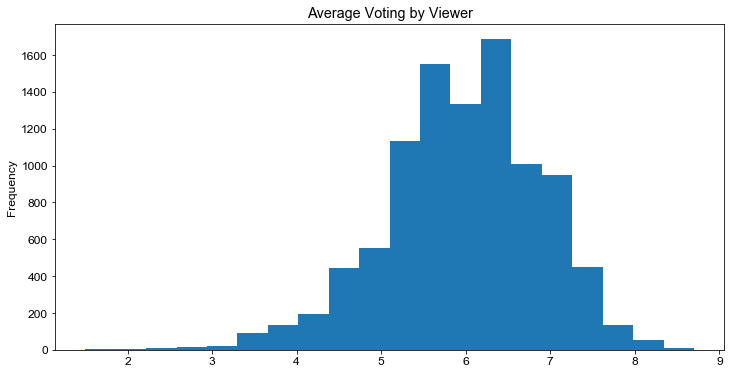

In [117]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
df.vote_average.plot(kind='hist', bins = 20, figsize = (12,6), title='Average Voting by Viewer')

<a id='conclusions'></a>
## Conclusions

Some of the meaningful insights extracted from the above analysis of data include:

- Avatar is highest grossing film of all time, followed by Star Wars: Force Awakens and Titanic.
- Friday saw the most number of film releases, followed by Thursday based on the day of week.
- Popularity has a positive affect on the success of a given film or its commercial revenue.
- Average vote among various films is around 6.0, with very few films having vote higher than 8.0.

<a id='limitations'></a>
### Limitations

- Extracted data may be incomplete, as there are several missing values. This affects its usability. <br/> (For example, missing values in columns like budget/revenue are replaced with their means).
- Data collected above varies in quality and format. Many unique values appear in individual columns. <br/>(For example, cast/genres columns have lots of unique values seperated by '|' operator).
- Such data needs lot of preprocessing before its ready for analysis. There may be incorect data types. <br/> (For example, release_date/release_year had to be transformed before using them in analysis).
- Such inconsistencies, must be treated with caution until making important decisions as it may produce biases. 

<a id='references'></a>
## References

1. Python Plotting Basics [https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a]
2. Quick dive into Pandas [https://towardsdatascience.com/quick-dive-into-pandas-for-data-science-cc1c1a80d9c4]
3. Data Wrangling with Pandas [https://towardsdatascience.com/data-wrangling-with-pandas-5b0be151df4e]

